# EDA & Modelling

## Package loading

In [1]:
from EZS_func import *
import numpy as np
import pandas as pd
import seaborn as sns
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
from pandas.api.types import is_numeric_dtype
from itertools import product
from scipy import stats
from sklearn import set_config
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from polylearn import PolynomialNetworkClassifier
from polylearn import FactorizationMachineClassifier


## Exploratory Data Analysis 

### File and parameters loading

In [2]:
problem_type = 'classification'

In [3]:
stacking = 'True'

In [4]:
data_size = 'small'

In [5]:
df = pd.read_csv('/home/philippe/Documents/python project/EZStacking-v0.6/dataset/iris.csv')

In [6]:
target_col = 'variety'

In [7]:
user_drop_cols = []

In [8]:
threshold_NaN = 0.5

In [9]:
threshold_cat = 3

In [10]:
threshold_Z = 3.0

### Dataset Information

In [11]:
df.shape

(150, 5)

#### Some records

In [12]:
display(df)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


#### Dataframe structure

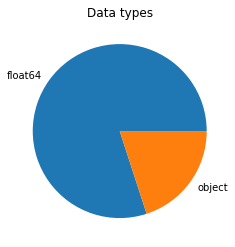

In [13]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [14]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal.length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal.width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


#### Which columns could be categorical ?

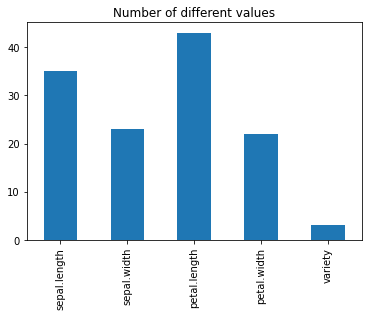

In [15]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [16]:
duplicates(df)

Number of rows before removing: 150
Number of duplicate rows: 1
Number of rows after removing: 149


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


#### Drop user's columns:

In [17]:
print('user_drop_cols = ', user_drop_cols)

user_drop_cols =  []


In [18]:
df = df.drop(user_drop_cols, axis=1)

#### Drop NaN:

In [19]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Final set of dropped columns

In [20]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [21]:
display(dropped_cols)

array([], dtype=float64)

#### Encoding data:

In [22]:
df, encoded_cols = encoding(df, threshold_cat)

Encoding numeric column: sepal.length
Encoding numeric column: sepal.width
Encoding numeric column: petal.length
Encoding numeric column: petal.width
Encoding object column: variety


#### Imputing NaN using IterativeImputer

##### Imputation

In [23]:
df = imputation(df)

No need to impute data.


#### Data compression:

In [24]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.01MB
Memory usage after optimization is: 0.00MB
Decreased by 75.9%


##### Dataframe structure after compression

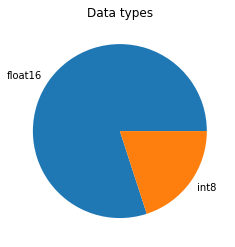

In [25]:
plot_dataframe_structure(df)

#### Outliers:

In [26]:
df = outliers(df, threshold_Z)

Using Z_score,  1  rows will be suppressed.


#### Splitting dataframe in features and targets

In [27]:
y = df[target_col]

In [28]:
X = df.drop(target_col, axis=1)

### Plottings

#### Correlation

##### Correlation with Seaborn

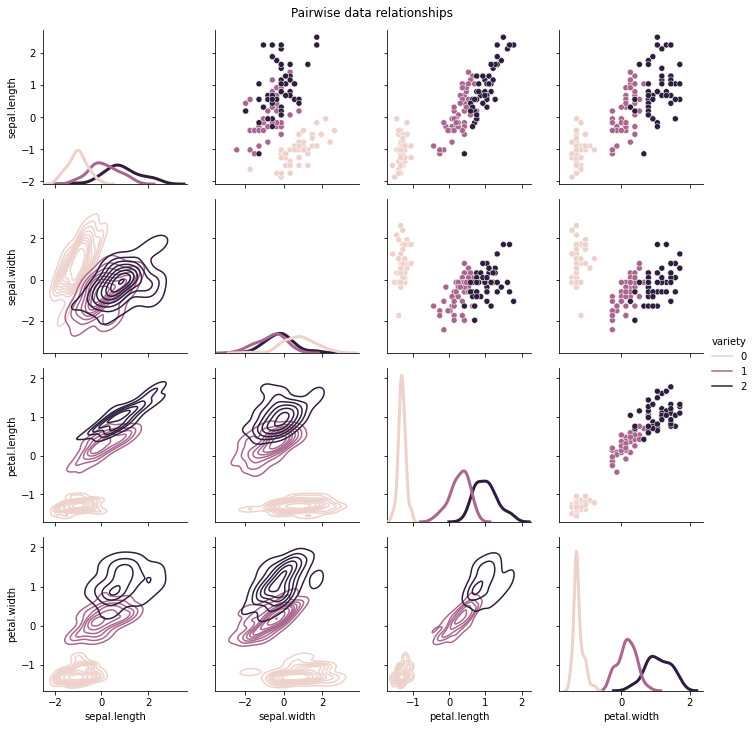

In [29]:
plot_sns_corr_class(df, target_col)

##### Heatmap with Seaborn

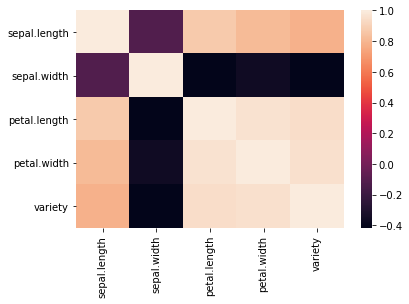

In [30]:
plt.figure()
sns.heatmap(df.corr())
plt.show()

## Splitting data in train and test sets 

In [31]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.33)

## Modelling

### Model building

##### Level-0 models

In [32]:
level_0 = [ 
          ('GPC', GaussianProcessClassifier()), 
          ('DTC', DecisionTreeClassifier(max_depth=5)), 
          ('RFC', RandomForestClassifier(max_depth=5, n_estimators=10, max_features='auto')), 
          ('ABC', AdaBoostClassifier()), 
          ('LOGR', LogisticRegression()), 
          ('MLPC', MLPClassifier(alpha=1, max_iter=1000, early_stopping=True)), 
          ('KNC', KNeighborsClassifier(n_neighbors=len(y.unique()))), 
          ('GNB', GaussianNB()), 
          ]

##### Level-1 model

In [33]:
level_1 = MLPClassifier()

##### Stacking for classification

In [34]:
model = StackingClassifier(level_0, final_estimator=level_1)

### Model fitting

In [35]:
%%time
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 2.95 s, sys: 1.03 s, total: 3.97 s
Wall time: 2.03 s


StackingClassifier(estimators=[('GPC', GaussianProcessClassifier()),
                               ('DTC', DecisionTreeClassifier(max_depth=5)),
                               ('RFC',
                                RandomForestClassifier(max_depth=5,
                                                       n_estimators=10)),
                               ('ABC', AdaBoostClassifier()),
                               ('LOGR', LogisticRegression()),
                               ('MLPC',
                                MLPClassifier(alpha=1, early_stopping=True,
                                              max_iter=1000)),
                               ('KNC', KNeighborsClassifier(n_neighbors=3)),
                               ('GNB', GaussianNB())],
                   final_estimator=MLPClassifier())

### Model evaluation

#### Model scoring

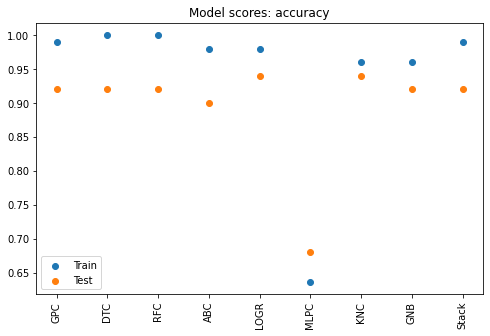

array([['GPC', 0.98989898989899, 0.92],
       ['DTC', 1.0, 0.92],
       ['RFC', 1.0, 0.92],
       ['ABC', 0.9797979797979798, 0.9],
       ['LOGR', 0.9797979797979798, 0.94],
       ['MLPC', 0.6363636363636364, 0.68],
       ['KNC', 0.9595959595959596, 0.94],
       ['GNB', 0.9595959595959596, 0.92],
       ['Stack', 0.98989898989899, 0.92]], dtype=object)

In [36]:
score_stacking_c(model, X_train, y_train, X_test, y_test)

#### Feature permutation importance (a posteriori)

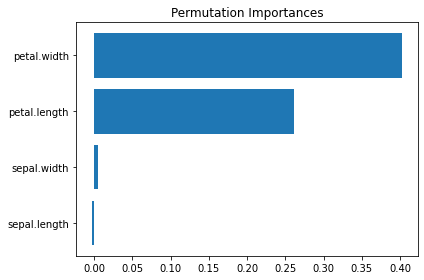

In [37]:
plot_perm_imp(model, X, y, scoring = 'accuracy');